### Notebook AE reconstructions
This notebook reconstructs a synthetic signal with the built autoencoders for each state

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model
from IPython.display import clear_output
%matplotlib widget

In [13]:
# Load AEs
AE = {}
for sdx, state in enumerate(['awake', 'asynch_MA', 'slow_MA', 'slow_updown']):
    AE[state] = load_model(f'autoencoders/autoencoder_simpl_state_{state}_epochs_150.h5')
clear_output()
print('Loaded')

Loaded


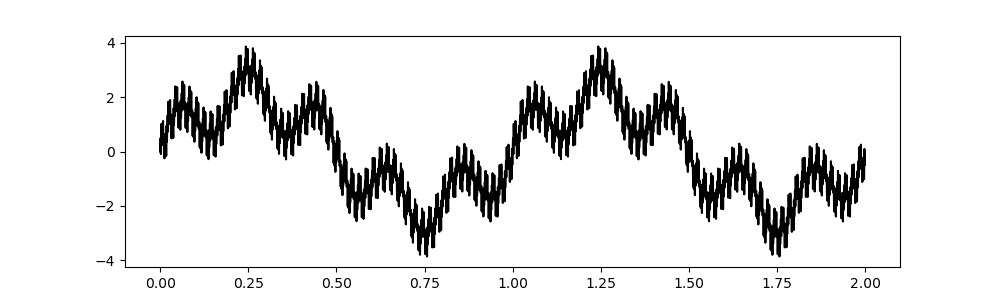

In [14]:
# create synthetic signals
samp_freq = 1000
time = np.arange(0, 2*samp_freq, 1) / samp_freq
y = 2*np.sin(2*np.pi*1*time) + np.sin(2*np.pi*5*time) + 0.5*np.sin(2*np.pi*50*time) + 0.5*np.sin(2*np.pi*400*time)

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(time, y, c='k')

2024-09-30 09:52:56.568081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2024-09-30 09:52:56.604735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-30 09:52:56.638627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-30 09:52:56.668558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


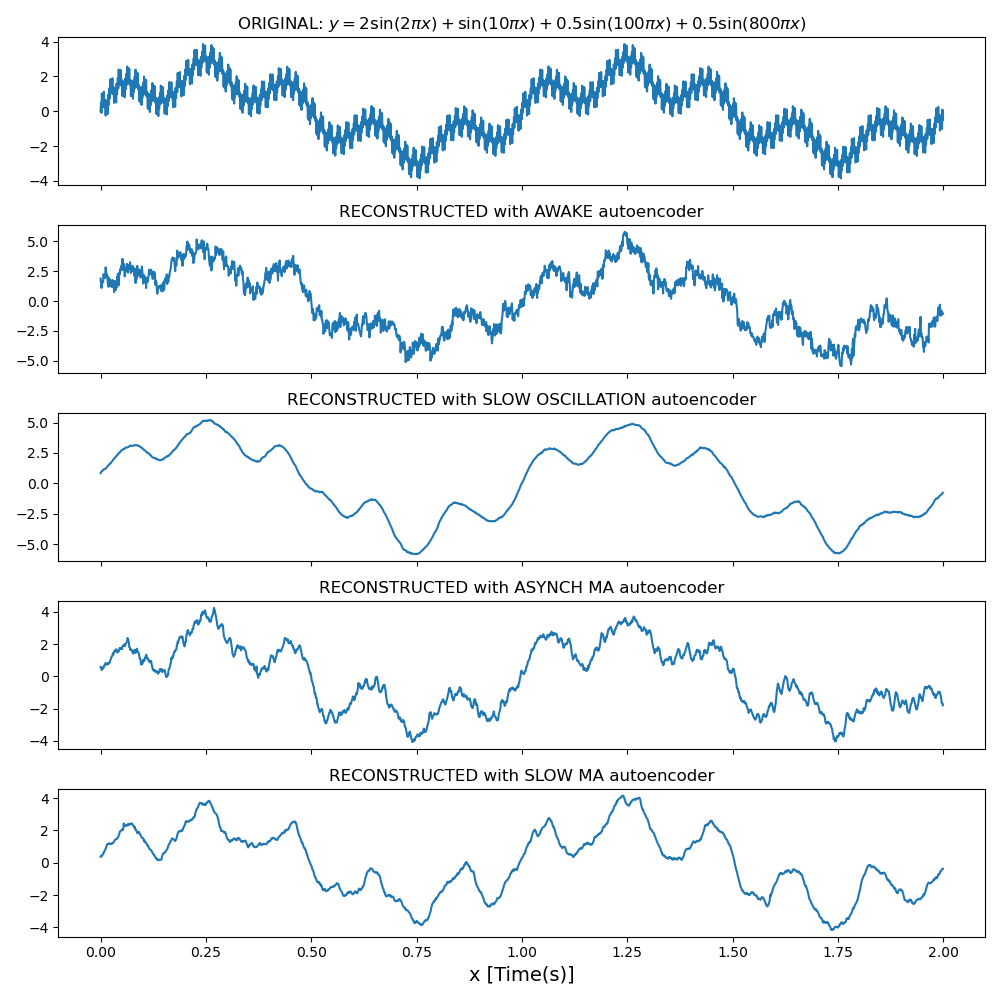

In [15]:
# Plot AE reconstructions
fig, ax = plt.subplots(nrows=5, figsize=(10, 10), sharex=True)
ax[0].plot(time, y)
ax[1].plot(time, AE['awake'].predict(np.vstack([y, y]), verbose=0)[0, :])
ax[2].plot(time, AE['slow_updown'].predict(np.vstack([y, y]), verbose=0)[0, :])
ax[3].plot(time, AE['asynch_MA'].predict(np.vstack([y, y]), verbose=0)[0, :])
ax[4].plot(time, AE['slow_MA'].predict(np.vstack([y, y]), verbose=0)[0, :])

ax[0].set_title('ORIGINAL: $y = 2\sin(2\pi x) + \sin(10\pi x) + 0.5\sin(100\pi x) + 0.5\sin(800\pi x)$')
ax[1].set_title('RECONSTRUCTED with AWAKE autoencoder')
ax[2].set_title('RECONSTRUCTED with SLOW OSCILLATION autoencoder')
ax[3].set_title('RECONSTRUCTED with ASYNCH MA autoencoder')
ax[4].set_title('RECONSTRUCTED with SLOW MA autoencoder')
ax[4].set_xlabel('x [Time(s)]', fontsize=14)
plt.tight_layout()